<a href="https://colab.research.google.com/github/cheeya-agwl/Stock-Market-Price-Movement-Prediction/blob/main/LSTM_share_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#in this we are going to use LSTM(recurrent neural network) to predict stock market price
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/driver')

MessageError: ignored

In [3]:
df=pd.read_csv('info1.csv')

In [4]:
df.head()
df.shape

(242, 7)

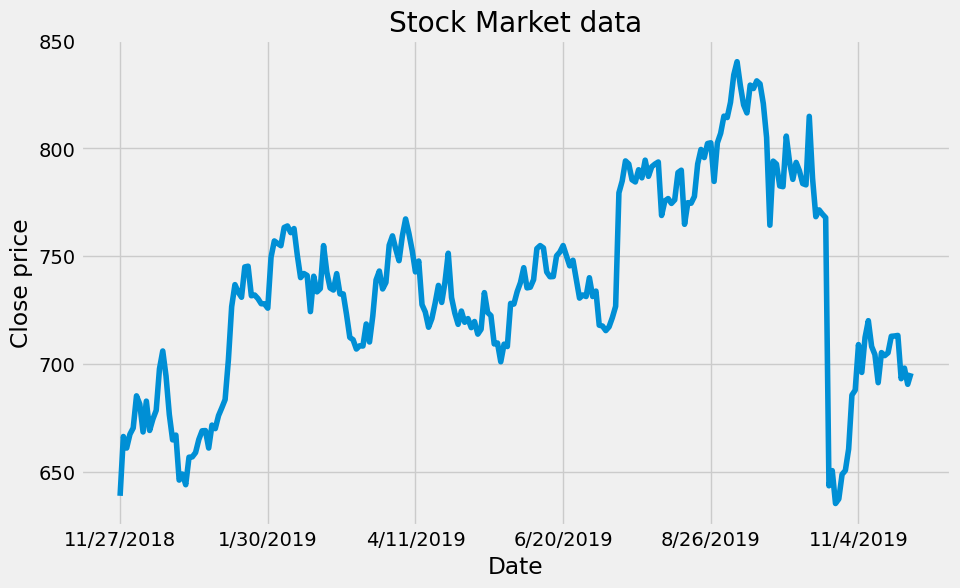

In [5]:
#visualizing the data
plt.figure(figsize=(10,6))
plt.title("Stock Market data")
plt.xlabel('Date')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.xticks(np.arange(0,242,45),df['Date'][0:242:45])
plt.show()

In [6]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(df)*0.8)
training_data_len

194

In [7]:
#scale the data between the values 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01733398],
       [0.15161133],
       [0.12548828],
       [0.15673828],
       [0.17089844],
       [0.24365234],
       [0.22485352],
       [0.16186523],
       [0.23168945],
       [0.1652832 ],
       [0.19116211],
       [0.21069336],
       [0.3046875 ],
       [0.34521484],
       [0.28833008],
       [0.20141602],
       [0.14404297],
       [0.15478516],
       [0.05297852],
       [0.06665039],
       [0.04248047],
       [0.10473633],
       [0.10546875],
       [0.11523438],
       [0.14501953],
       [0.16455078],
       [0.16503906],
       [0.12548828],
       [0.17749023],
       [0.16943359],
       [0.19897461],
       [0.21655273],
       [0.23510742],
       [0.32495117],
       [0.44555664],
       [0.49536133],
       [0.47851563],
       [0.46679688],
       [0.53540039],
       [0.53710938],
       [0.47021484],
       [0.47192383],
       [0.46386719],
       [0.45214844],
       [0.4519043 ],
       [0.44213867],
       [0.55761719],
       [0.594

In [8]:
train_data=scaled_data[0:training_data_len,:]
len(train_data)

194

In [9]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)



len(x_train)
len(y_train)

[array([0.01733398, 0.15161133, 0.12548828, 0.15673828, 0.17089844,
       0.24365234, 0.22485352, 0.16186523, 0.23168945, 0.1652832 ,
       0.19116211, 0.21069336, 0.3046875 , 0.34521484, 0.28833008,
       0.20141602, 0.14404297, 0.15478516, 0.05297852, 0.06665039,
       0.04248047, 0.10473633, 0.10546875, 0.11523438, 0.14501953,
       0.16455078, 0.16503906, 0.12548828, 0.17749023, 0.16943359,
       0.19897461, 0.21655273, 0.23510742, 0.32495117, 0.44555664,
       0.49536133, 0.47851563, 0.46679688, 0.53540039, 0.53710938,
       0.47021484, 0.47192383, 0.46386719, 0.45214844, 0.4519043 ,
       0.44213867, 0.55761719, 0.59423828, 0.58862305, 0.58349609,
       0.62475586, 0.62817383, 0.61303711, 0.62231445, 0.56201172,
       0.51123047, 0.52050781, 0.51611328, 0.43432617, 0.5144043 ])]
[0.47900390625000044]


134

In [10]:
#convert the x_train and y_train into numpy array
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(134, 60, 1)

In [11]:
#create an lstm model
model=Sequential()
model.add(LSTM( 50, return_sequences=True, input_shape=(x_train.shape[1],1 )))
model.add(LSTM( 50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#fit training data into the model
model.fit(x_train,y_train,batch_size=1,epochs=50)

Epoch 1/50
134/134 [==============================] - 10s 29ms/step - loss: 0.0205
Epoch 2/50
134/134 [==============================] - 4s 32ms/step - loss: 0.0116
Epoch 3/50
134/134 [==============================] - 5s 40ms/step - loss: 0.0098
Epoch 4/50
134/134 [==============================] - 4s 32ms/step - loss: 0.0069
Epoch 5/50
134/134 [==============================] - 4s 30ms/step - loss: 0.0067
Epoch 6/50
134/134 [==============================] - 5s 39ms/step - loss: 0.0054
Epoch 7/50
134/134 [==============================] - 4s 31ms/step - loss: 0.0062
Epoch 8/50
134/134 [==============================] - 4s 31ms/step - loss: 0.0053
Epoch 9/50
134/134 [==============================] - 6s 41ms/step - loss: 0.0048
Epoch 10/50
134/134 [==============================] - 4s 31ms/step - loss: 0.0049
Epoch 11/50
134/134 [==============================] - 4s 32ms/step - loss: 0.0043
Epoch 12/50
134/134 [==============================] - 6s 43ms/step - loss: 0.0037
Epoch 13/50


In [14]:
#creating testing data
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [15]:
#convert into numpy array
x_test=np.array(x_test)
x_test.shape
#reshape data convert into three dimensional
x_test=np.reshape(x_test,( x_test.shape[0], x_test.shape[1], 1 ))

In [16]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)# as predicted data will be in the scaled format

2/2 [==============================] - 1s 16ms/step


In [17]:
#calaculation of rmse
from sklearn.metrics import mean_squared_error
rm=np.sqrt(mean_squared_error(prediction,y_test))
print("Testing error is",rm)

Testing error is 24.78299492788513


<ipython-input-18-a4c86a62f513>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=prediction


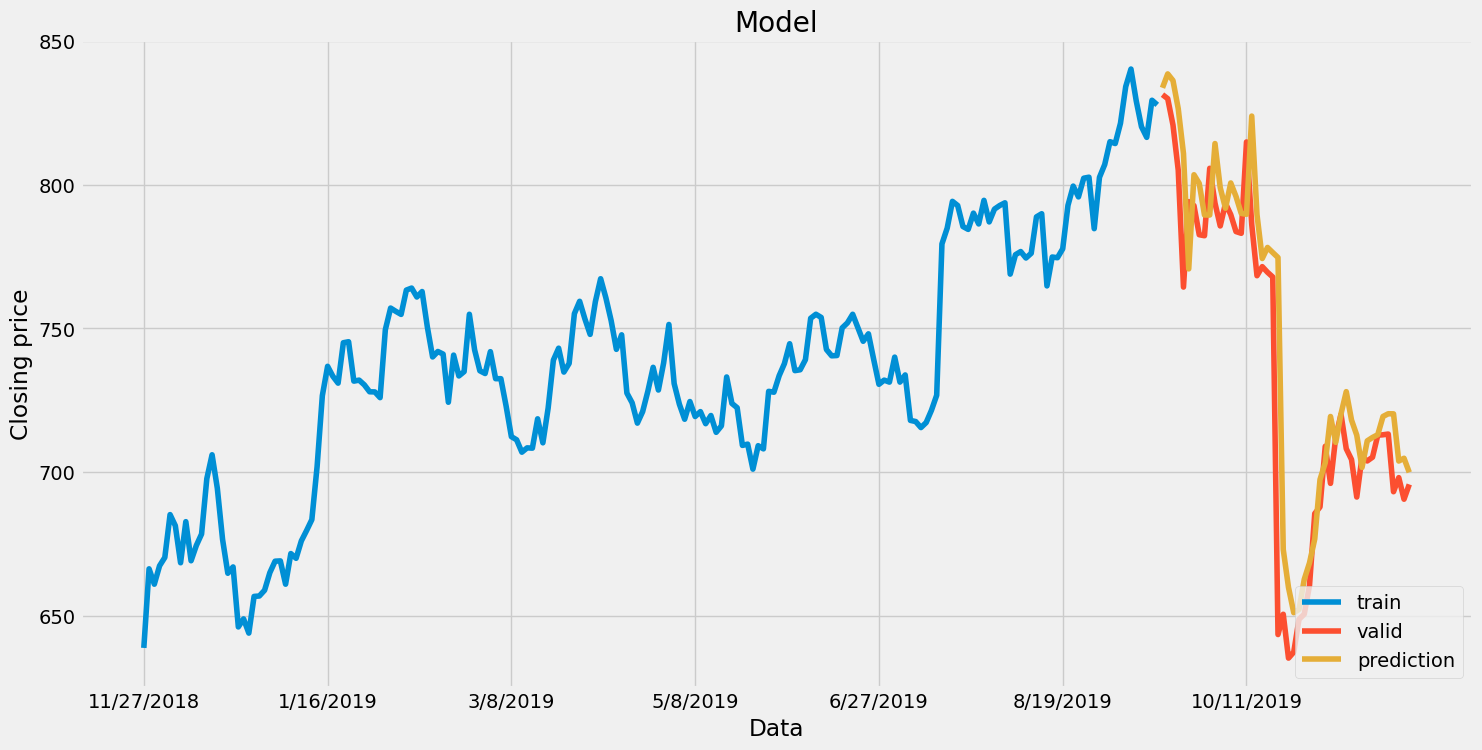

In [18]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediction']=prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['train','valid','prediction'],loc='lower right')
plt.xticks(np.arange(0,242,35),df['Date'][0:242:35])
plt.show()

In [19]:
valid# this the dataframe for actual closing and predicted value
valid['Date']=df['Date'][training_data_len:]
valid

<ipython-input-19-a957306cc594>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date']=df['Date'][training_data_len:]


,Close,Prediction,Date
194,831.25,833.614868,9/17/2019
195,829.85,838.457825,9/18/2019
196,820.70,836.154602,9/19/2019
197,805.00,826.382446,9/20/2019
198,764.35,810.767883,9/23/2019
199,794.05,770.678467,9/24/2019
200,792.65,803.395874,9/25/2019
201,782.55,800.377075,9/26/2019
202,782.20,789.412964,9/27/2019
203,805.65,789.400391,9/30/2019
